BASELINES:
1. NON MACHINE LEARNING BASELINES:
    * TOMMORROW'S PRICE = YESTERDAY'S PRICE
    * MOVING AVERAGE
    * ARIMA

2. MACHINE LEARNING BASLINES:
    * GRADIENT BOOSTING
    * RANDOM FORREST

3. NN BASELINES:
    * DENSE
    * 1DCONVNET
    * LSTM
    * GRU




In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# loading data
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
cd /gdrive/My Drive/Studia/INZYNIERKA/stock_market_prediction/data

/gdrive/My Drive/Studia/INŻYNIERKA/data


In [0]:
import pickle
with open('raw_stock_data.pickle', 'rb') as handle:
    data = pickle.load(handle)

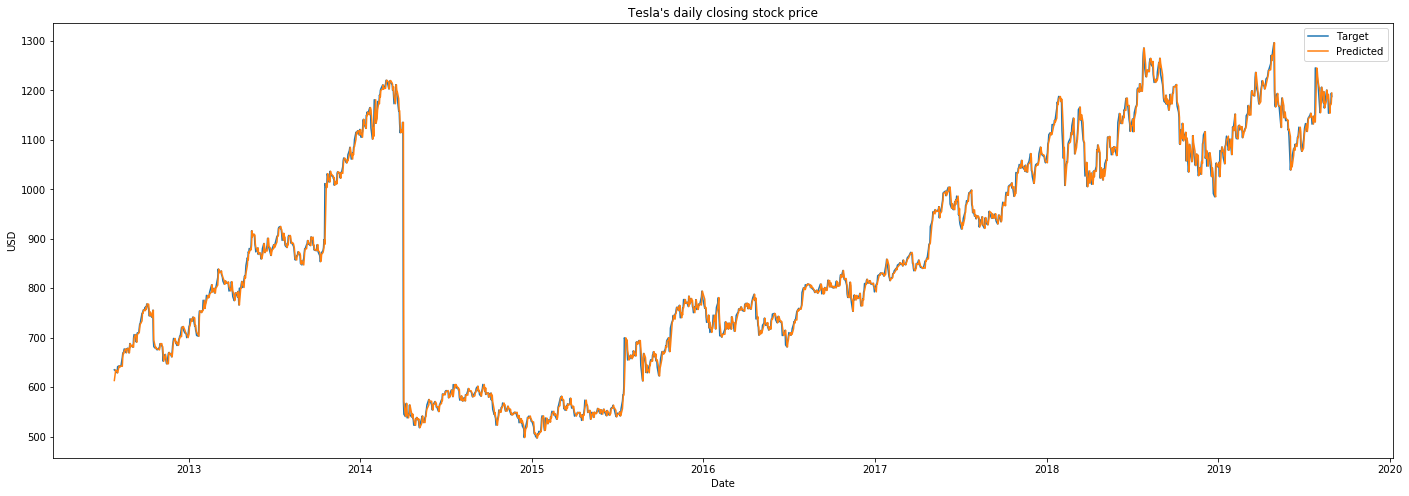

In [0]:
#   TOMMORROW'S PRICE = YESTERDAY'S PRICE

df = data['tesla']
non_ml_base = df.copy(deep=True)
non_ml_base.Close = non_ml_base.Close.shift(1)
non_ml_base.fillna(0, inplace=True)
targets = df.Close
estimates = non_ml_base.Close

plt.figure(figsize=(24,8))
plt.plot(targets.iloc[2000:])
plt.plot(estimates.iloc[2000:])
plt.title("Tesla's daily closing stock price")
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(['Target', 'Predicted'])
plt.show()

In [0]:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(targets, estimates)

3.7429701169337375

In [0]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [0]:
lookback = 10
step = 1
num_days_to_predict = 0
train_start_index = 0
train_end_index = 50
train_batch_size = 20

train_gen = generator(df.to_numpy(),
                        lookback=lookback,
                        delay=num_days_to_predict,
                        min_index=train_start_index,
                        max_index=train_end_index,
                        shuffle=False,
                        step=step,
                        batch_size=train_batch_size)

In [0]:
x, y = next(train_gen)